<a href="https://colab.research.google.com/github/shivi13102/Vehicles_Efficiency_Rate_Prediction/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
import pandas as pd
import time
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor, VotingRegressor
from sklearn.neural_network import MLPRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

In [139]:
# Load the datasets
train = pd.read_csv("/content/cleaned_train_data.csv")
test = pd.read_csv("/content/cleaned_test_data.csv")

In [140]:
display(train)

,ID,PERFORMANCE_INDEX,EMISSIONS_CO2,URBAN_CONSUMPTION,DISPLACEMENT,CAPACITY,PISTON_COUNT,BLENDED_CONSUMPTION,GEARBOX_TYPE,OUTPUT,BODY_STYLE,EFFICIENCY_RATIO,YEARS_IN_SERVICE,MILEAGE,HIGHWAY_USAGE,ENERGY_SOURCE,EFFICIENCY_RATING
0,0,0.196465,0.113260,0.144531,0.166667,0.1875,4.0,0.151659,Manual,0.112805,COMPACT,0.811111,10.0,0.35,0.044872,Petrol,39.0
1,1,0.124786,0.425414,0.699219,0.433333,0.8125,6.0,0.559242,Automatic,0.344512,SUV - SMALL,0.722222,10.0,0.45,0.474359,Petrol,23.0
2,2,0.181904,0.265193,0.277344,0.300000,0.1875,6.0,0.251185,Automatic,0.371951,MID-SIZE,0.800000,10.0,0.40,0.352564,Gas,30.0
3,3,0.267287,0.533149,0.734375,0.783333,0.7500,8.0,0.436019,Automatic,0.719512,PICKUP TRUCK - STANDARD,0.611111,10.0,0.45,0.557692,Petrol,28.0
4,4,0.373064,0.737569,0.621094,0.200000,0.1875,4.0,0.341232,Manual,0.207317,MID-SIZE,0.744444,10.0,0.45,0.307692,Petrol,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.422467,0.560773,0.449219,0.683333,0.3125,6.0,0.232227,Automatic,0.652439,MID-SIZE,0.488889,10.0,0.45,0.153846,Petrol,27.0
4996,4996,0.368146,0.491713,0.542969,0.416667,0.3125,8.0,0.492891,Automatic,0.658537,FULL-SIZE,0.666667,10.0,0.35,0.512821,Petrol,20.0
4997,4997,0.138840,0.323204,0.230469,0.066667,0.1250,4.0,0.066351,Automatic,0.112805,MID-SIZE,0.511111,10.0,0.35,0.121795,Diesel,31.0
4998,4998,0.218517,0.345304,0.203125,0.350000,0.1875,4.0,0.189573,Automatic,0.198171,MID-SIZE,0.844444,10.0,0.30,0.134615,Gas,33.0


In [141]:
train.columns

Index(['ID', 'PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
       'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT', 'BLENDED_CONSUMPTION',
       'GEARBOX_TYPE', 'OUTPUT', 'BODY_STYLE', 'EFFICIENCY_RATIO',
       'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE', 'ENERGY_SOURCE',
       'EFFICIENCY_RATING'],
      dtype='object')

In [142]:
selected_features= ['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
       'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT', 'BLENDED_CONSUMPTION',
       'OUTPUT','EFFICIENCY_RATIO', 'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE']

In [143]:
# Data preprocessing
X = train[selected_features] # Features after VIF check
y = train['EFFICIENCY_RATING']  # Target variable

In [144]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'SVR': SVR(),
}

# Dictionary to store model results
results = {}

In [146]:
# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Fit model on training data
    if model_name in ['SVR', 'KNN']:  # These models require scaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R²': r2
    }

Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Training SVR...


In [147]:
# Define weights for each metric (prioritize MAE)
weights = {
    'MAE': 0.5,  # Higher weight for MAE
    'MSE': 0.3,  # Medium weight for MSE
    'R²': 0.2    # Lower weight for R²
}

# Calculate composite score for each model
composite_scores = {}
for model_name, metrics in results.items():
    score = (weights['MAE'] * metrics['MAE'] +
             weights['MSE'] * metrics['MSE'] +
             weights['R²'] * (1 - metrics['R²']))  # We minimize MAE and MSE, maximize R²
    composite_scores[model_name] = score

In [148]:
# Display results
print("\nModel Evaluation Results (Prioritizing MAE):")
for model_name, metrics in results.items():
    print(f"\n{model_name} - Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R-squared (R²): {metrics['R²']}")


Model Evaluation Results (Prioritizing MAE):

Linear Regression - Performance Metrics:
Mean Absolute Error (MAE): 5.182567065319821
Mean Squared Error (MSE): 48.52761215166057
R-squared (R²): 0.5514523546664798

Random Forest - Performance Metrics:
Mean Absolute Error (MAE): 4.8995
Mean Squared Error (MSE): 42.4187206
R-squared (R²): 0.6079177111841592

Gradient Boosting - Performance Metrics:
Mean Absolute Error (MAE): 4.882805457178799
Mean Squared Error (MSE): 42.38180874260917
R-squared (R²): 0.6082588927503529

XGBoost - Performance Metrics:
Mean Absolute Error (MAE): 5.19877467918396
Mean Squared Error (MSE): 48.25456307905428
R-squared (R²): 0.5539761862161404

SVR - Performance Metrics:
Mean Absolute Error (MAE): 5.372470414386047
Mean Squared Error (MSE): 55.14895513661313
R-squared (R²): 0.4902503364100661


In [149]:
# Display composite scores and select the best model
best_model_name = min(composite_scores, key=composite_scores.get)
print(f"\nBest Model based on Weighted Scores (Prioritizing MAE): {best_model_name}")


Best Model based on Weighted Scores (Prioritizing MAE): Gradient Boosting


In [150]:
# Record start time for training
start_time_training = time.time()
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
end_time_training = time.time()

# Record start time for predictions
start_time_prediction = time.time()
y_pred = model.predict(X_test)
end_time_prediction = time.time()

# Calculate Speed (Time taken)
training_time = end_time_training - start_time_training
prediction_time = end_time_prediction - start_time_prediction

print("\nModel Speed (Time taken):")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")


Model Speed (Time taken):
Training Time: 0.9521 seconds
Prediction Time: 0.0038 seconds


# Testing with Test Dataset

In [151]:
# Select the same features used for training
selected_features= ['PERFORMANCE_INDEX', 'EMISSIONS_CO2', 'URBAN_CONSUMPTION',
       'DISPLACEMENT', 'CAPACITY', 'PISTON_COUNT', 'BLENDED_CONSUMPTION',
       'OUTPUT','EFFICIENCY_RATIO', 'YEARS_IN_SERVICE', 'MILEAGE', 'HIGHWAY_USAGE']
X_new = test[selected_features]

# Predict EFFICIENCY_RATING for the new data using the trained model
y_new_pred = model.predict(X_new)

# Add the predictions as a new column
test['EFFICIENCY_RATING'] = y_new_pred

# Save the results to a new CSV file
test.to_csv("/content/predicted_efficiency.csv", index=False)

print("Predictions saved to predicted_efficiency.csv")

Predictions saved to predicted_efficiency.csv


In [152]:
new_table = test[['ID', 'EFFICIENCY_RATING']]

# Save the new table to a new CSV file or a new database table
new_table.to_csv('predicted_efficiency1.csv', index=False)

# Improvement Comparison

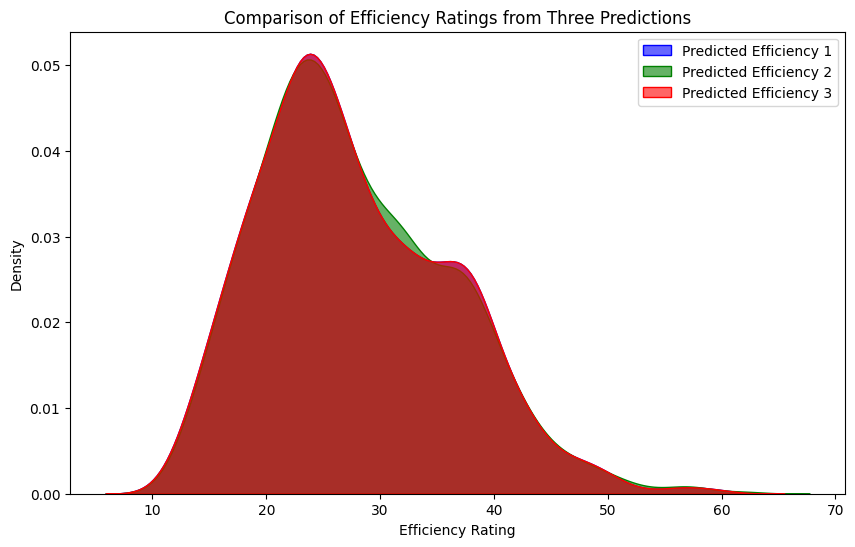

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV files into DataFrames
predicted_efficiency1 = pd.read_csv("/content/predicted_efficiency1.csv")
predicted_efficiency2 = pd.read_csv("/content/predicted_efficiency2.csv")
predicted_efficiency3 = pd.read_csv("/content/predicted_efficiency3.csv")

# Extract the relevant columns from each table
efficiency1 = predicted_efficiency1['EFFICIENCY_RATING']
efficiency2 = predicted_efficiency2['EFFICIENCY_RATING']
efficiency3 = predicted_efficiency3['EFFICIENCY_RATING']

# Plotting the comparison using KDE plots
plt.figure(figsize=(10, 6))

# Plot the KDE for each set
sns.kdeplot(efficiency1, label='Predicted Efficiency 1', fill=True, color='blue', alpha=0.6)
sns.kdeplot(efficiency2, label='Predicted Efficiency 2', fill=True, color='green', alpha=0.6)
sns.kdeplot(efficiency3, label='Predicted Efficiency 3', fill=True, color='red', alpha=0.6)

# Adding title and labels
plt.title('Comparison of Efficiency Ratings from Three Predictions')
plt.xlabel('Efficiency Rating')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()
